In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
from pprint import pprint
import plotly
import plotly.plotly as py
import plotly.tools as tls
import plotly.figure_factory as ff

# Census API Key
from config import api_key, plotly_key

# Plotly credentials
plotly.tools.set_credentials_file(username='chelmo', api_key=plotly_key)

#from apikeys import CENSUS_API_KEY
c = Census(api_key, year=2017)

# Run census data and include the following codes:

* B01003_001E = Total Population
* B15001_004E = Estimate!!Total!!Male!!18 to 24 years!!Less than 9th grade
* B15001_005E = Estimate!!Total!!Male!!18 to 24 years!!9th to 12th grade, no diploma
* B15001_006E = Estimate!!Total!!Male!!18 to 24 years!!High school graduate (includes equivalency)
* B15001_007E = Estimate!!Total!!Male!!18 to 24 years!!Some college, no degree
* B15001_008E = Estimate!!Total!!Male!!18 to 24 years!!Associate's degree
* B15001_009E = Estimate!!Total!!Male!!18 to 24 years!!Bachelor's degree
* B15001_010E = Estimate!!Total!!Male!!18 to 24 years!!Graduate or professional degree
* B15001_044E = Estimate!!Total!!Female!!18 to 24 years
* B15001_045E = Estimate!!Total!!Female!!18 to 24 years!!Less than 9th grade
* B15001_046E = Estimate!!Total!!Female!!18 to 24 years!!9th to 12th grade, no diploma
* B15001_047E = Estimate!!Total!!Female!!18 to 24 years!!High school graduate (includes equivalency)
* B15001_048E = Estimate!!Total!!Female!!18 to 24 years!!Some college, no degree
* B15001_049E = Estimate!!Total!!Female!!18 to 24 years!!Associate's degree
* B15001_050E = Estimate!!Total!!Female!!18 to 24 years!!Bachelor's degree
* B15001_051E = Estimate!!Total!!Female!!18 to 24 years!!Graduate or professional degree
* B15003_002E = Estimate!!Total!!No schooling completed
* B15003_003E = Estimate!!Total!!Nursery school
* B15003_004E = Estimate!!Total!!Kindergarten
* B15003_005E = Estimate!!Total!!1st grade
* B15003_006E = Estimate!!Total!!2nd grade
* B15003_007E = Estimate!!Total!!3rd grade
* B15003_008E = Estimate!!Total!!4th grade
* B15003_009E = Estimate!!Total!!5th grade
* B15003_010E = Estimate!!Total!!6th grade
* B15003_011E = Estimate!!Total!!7th grade
* B15003_012E = Estimate!!Total!!8th grade
* B15003_013E = Estimate!!Total!!9th grade
* B15003_014E = Estimate!!Total!!10th grade
* B15003_015E = Estimate!!Total!!11th grade
* B15003_016E = Estimate!!Total!!12th grade, no diploma
* B15003_017E = Estimate!!Total!!Regular high school diploma
* B15003_018E = Estimate!!Total!!GED or alternative credential
* B15003_019E = Estimate!!Total!!Some college, less than 1 year
* B15003_020E = Estimate!!Total!!Some college, 1 or more years, no degree
* B15003_021E = Estimate!!Total!!Associate's degree
* B15003_022E = Estimate!!Total!!Bachelor's degree
* B15003_023E = Estimate!!Total!!Master's degree
* B15003_024E = Estimate!!Total!!Professional school degree
* B15003_025E = Estimate!!Total!!Doctorate degree

In [2]:
# Run Census Search to retrieve data for all counties
census_data = c.acs5.get(("NAME","B01003_001E","B15001_001E", "B15001_004E", "B15001_005E",
                          "B15001_006E","B15001_007E","B15001_008E","B15001_009E",
                          "B15001_010E","B15001_044E","B15001_045E","B15001_046E",
                          "B15001_047E","B15001_048E","B15001_049E","B15001_050E",
                          "B15001_051E","B15003_002E","B15003_003E","B15003_004E",
                          "B15003_005E","B15003_006E","B15003_007E","B15003_008E",
                          "B15003_009E","B15003_010E","B15003_011E","B15003_012E",
                          "B15003_013E","B15003_014E","B15003_015E","B15003_016E",
                          "B15003_017E","B15003_018E","B15003_019E","B15003_020E",
                          "B15003_021E","B15003_022E","B15003_023E","B15003_024E",
                          "B15003_025E"), {'for': 'county:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"NAME":"County Name",
                                      "county":"County Code",
                                      "B01003_001E":"Total Pop",
                                      "B15001_001E":"Total Male Pop",
                                      "B15001_004E":"Male 18-24 <9th", 
                                      "B15001_005E":"Male 18-24 no diploma",
                                      "B15001_006E":"Male 18-24 HS grad or equiv",
                                      "B15001_007E":"Male 18-24 Some college, no degree",
                                      "B15001_008E":"Male 18-24 Associates",
                                      "B15001_009E":"Male 18-24 Bachelors",
                                      "B15001_010E":"Male 18-24 Grad or Professional",
                                      "B15001_044E":"Total Female Pop",
                                      "B15001_045E":"Female 18-24 <9th",
                                      "B15001_046E":"Female 18-24 no diploma",
                                      "B15001_047E":"Female 18-24 HS grad or equiv",
                                      "B15001_048E":"Female 18-24 Some college, no degree",
                                      "B15001_049E":"Female 18-24 Associates",
                                      "B15001_050E":"Female 18-24 Bachelors",
                                      "B15001_051E":"Female 18-24 Grad or Professional",
                                      "B15003_002E":"25+ no schooling",
                                      "B15003_003E":"25+ nursery school",
                                      "B15003_004E":"25+ Kindergarten",
                                      "B15003_005E":"25+ 1st grade",
                                      "B15003_006E":"25+ 2nd grade",
                                      "B15003_007E":"25+ 3rd grade",
                                      "B15003_008E":"25+ 4th grade",
                                      "B15003_009E":"25+ 5th grade",
                                      "B15003_010E":"25+ 6th grade",
                                      "B15003_011E":"25+ 7th grade",
                                      "B15003_012E":"25+ 8th grade",
                                      "B15003_013E":"25+ 9th grade",
                                      "B15003_014E":"25+ 10th grade",
                                      "B15003_015E":"25+ 11th grade",
                                      "B15003_016E":"25+ 12th grade no diploma",
                                      "B15003_017E":"25+ high school diploma",
                                      "B15003_018E":"25+ GED or equivalent",
                                      "B15003_019E":"25+ some college <1 yr",
                                      "B15003_020E":"25+ some college >1 yr no degree",
                                      "B15003_021E":"25+ Associates Degree",
                                      "B15003_022E":"25+ Bachelors Degree",
                                      "B15003_023E":"25+ Masters Degree",
                                      "B15003_024E":"25+ Professional Degree",
                                      "B15003_025E":"25+ PhD"})

census_pd.head()


,Total Pop,Total Male Pop,Male 18-24 <9th,Male 18-24 no diploma,Male 18-24 HS grad or equiv,"Male 18-24 Some college, no degree",Male 18-24 Associates,Male 18-24 Bachelors,Male 18-24 Grad or Professional,Total Female Pop,...,25+ some college <1 yr,25+ some college >1 yr no degree,25+ Associates Degree,25+ Bachelors Degree,25+ Masters Degree,25+ Professional Degree,25+ PhD,County Name,County Code,state
0,34933.0,27023.0,55.0,204.0,653.0,626.0,237.0,25.0,0.0,1783.0,...,542.0,2972.0,1837.0,3142.0,792.0,0.0,92.0,"Corozal Municipio, Puerto Rico",047,72
1,11297.0,8971.0,18.0,52.0,136.0,273.0,66.0,0.0,0.0,525.0,...,37.0,935.0,690.0,1156.0,184.0,0.0,13.0,"Maunabo Municipio, Puerto Rico",095,72
2,21661.0,16383.0,56.0,103.0,290.0,541.0,78.0,36.0,0.0,1116.0,...,224.0,1095.0,1712.0,2415.0,323.0,99.0,125.0,"Peñuelas Municipio, Puerto Rico",111,72
3,148863.0,116766.0,307.0,917.0,2504.0,3533.0,447.0,479.0,0.0,7409.0,...,1399.0,10273.0,8357.0,19156.0,4363.0,1179.0,1714.0,"Ponce Municipio, Puerto Rico",113,72
4,38970.0,30818.0,28.0,144.0,635.0,763.0,83.0,82.0,21.0,1681.0,...,337.0,3116.0,2301.0,4135.0,666.0,116.0,71.0,"San Sebastián Municipio, Puerto Rico",131,72


In [4]:
# Print DF to a csv file
census_pd.to_csv("raw_data.csv", encoding="utf-8", index=False)

In [6]:
# Combine 18-24 male/female
census_pd['18-24 < 9th'] = census_pd['Male 18-24 <9th']+census_pd['Female 18-24 <9th']
census_pd['18-24 No HS Diploma'] = census_pd['Male 18-24 no diploma']+census_pd['Female 18-24 no diploma']
census_pd['18-24 HS Grad or Equiv'] = census_pd['Male 18-24 HS grad or equiv']+census_pd['Female 18-24 HS grad or equiv']
census_pd['18-24 Some College, No Degree'] = census_pd['Male 18-24 Some college, no degree']+census_pd['Female 18-24 Some college, no degree']
census_pd['18-24 Associates'] = census_pd['Male 18-24 Associates']+census_pd['Female 18-24 Associates']
census_pd['18-24 Bachelors'] = census_pd['Male 18-24 Bachelors']+census_pd['Female 18-24 Bachelors']
census_pd['18-24 Grad or Professional'] = census_pd['Male 18-24 Grad or Professional']+census_pd['Female 18-24 Grad or Professional']

# Combine 25+ into final categories
census_pd['25+ < 9th'] = census_pd['25+ no schooling']+census_pd['25+ nursery school']+census_pd['25+ Kindergarten']+census_pd['25+ 1st grade']+census_pd['25+ 2nd grade']+census_pd['25+ 3rd grade']+census_pd['25+ 4th grade']+census_pd['25+ 5th grade']+census_pd['25+ 6th grade']+census_pd['25+ 7th grade']+census_pd['25+ 8th grade']
census_pd['25+ No HS Diploma'] = census_pd['25+ 9th grade']+census_pd['25+ 10th grade']+census_pd['25+ 11th grade']+census_pd['25+ 12th grade no diploma']
census_pd['25+ HS Grad or Equiv'] = census_pd['25+ high school diploma']+census_pd['25+ GED or equivalent']
census_pd['25+ Some College, No Degree'] = census_pd['25+ some college <1 yr']+census_pd['25+ some college >1 yr no degree']
census_pd['25+ Associates'] = census_pd['25+ Associates Degree']
census_pd['25+ Bachelors'] = census_pd['25+ Bachelors Degree']
census_pd['25+ Grad or Professional'] = census_pd['25+ Masters Degree']+census_pd['25+ Professional Degree']+census_pd['25+ PhD']

# Combine 18-14 and 25+ data into population totals per category
census_pd['< 9th'] = census_pd['18-24 < 9th']+census_pd['25+ < 9th']
census_pd['No HS Diploma'] = census_pd['18-24 No HS Diploma']+census_pd['25+ No HS Diploma']
census_pd['HS Grad or Equiv'] = census_pd['18-24 HS Grad or Equiv']+census_pd['25+ HS Grad or Equiv']
census_pd['Some College, No Degree'] = census_pd['18-24 Some College, No Degree']+census_pd['25+ Some College, No Degree']
census_pd['Associates'] = census_pd['18-24 Associates']+census_pd['25+ Associates']
census_pd['Bachelors'] = census_pd['18-24 Bachelors']+census_pd['25+ Bachelors']
census_pd['Grad or Professional'] = census_pd['18-24 Grad or Professional']+census_pd['25+ Grad or Professional']
census_pd['State'] = census_pd['state']

# Add zeros to county codes to prepare to concatenate with state codes to create FIPS codes
census_pd['County Code']=census_pd['County Code'].apply(lambda x: '{0:0>3}'.format(x))
census_pd['County Code']=census_pd['County Code'].apply(lambda x: '{0:0>2}'.format(x))

# Create new DF from info
ed_df = census_pd.loc[:, ['County Name','County Code','State','Total Pop','< 9th','No HS Diploma','HS Grad or Equiv',
                  'Some College, No Degree','Associates',
                  'Bachelors','Grad or Professional']]
ed_df.head()

,County Name,County Code,State,Total Pop,< 9th,No HS Diploma,HS Grad or Equiv,"Some College, No Degree",Associates,Bachelors,Grad or Professional
0,"Corozal Municipio, Puerto Rico",047,72,34933.0,4736.0,3141.0,7702.0,5059.0,2263.0,3238.0,884.0
1,"Maunabo Municipio, Puerto Rico",095,72,11297.0,1959.0,962.0,2270.0,1575.0,805.0,1203.0,197.0
2,"Peñuelas Municipio, Puerto Rico",111,72,21661.0,2445.0,1811.0,4876.0,2317.0,1850.0,2525.0,559.0
3,"Ponce Municipio, Puerto Rico",113,72,148863.0,15948.0,9672.0,35374.0,18771.0,9252.0,20381.0,7368.0
4,"San Sebastián Municipio, Puerto Rico",131,72,38970.0,7655.0,2455.0,7765.0,5293.0,2384.0,4392.0,874.0


In [7]:
# Divide by population total to find percentage
ed_df['% < 9th'] = ed_df['< 9th']/ed_df['Total Pop']*100
ed_df['% No HS Diploma'] = ed_df['No HS Diploma']/ed_df['Total Pop']*100
ed_df['% HS Grad or Equiv'] = ed_df['HS Grad or Equiv']/ed_df['Total Pop']*100
ed_df['% Some College, No Degree'] = ed_df['Some College, No Degree']/ed_df['Total Pop']*100
ed_df['% Associates'] = ed_df['Associates']/ed_df['Total Pop']*100
ed_df['% Bachelors'] = ed_df['Bachelors']/ed_df['Total Pop']*100
ed_df['% Grad or Professional'] = ed_df['Grad or Professional']/ed_df['Total Pop']*100

# Create FIPS code column and concatenate state and county columns into it
ed_df['FIPS Code'] = ed_df['State'].astype(str) + ed_df['County Code'].astype(str)

# Assemble final DF
final_df = ed_df.loc[:,['County Name','FIPS Code','% < 9th','% No HS Diploma','% HS Grad or Equiv',
                        '% Some College, No Degree','% Associates','% Bachelors',
                        '% Grad or Professional']]

final_df.head()


,County Name,FIPS Code,% < 9th,% No HS Diploma,% HS Grad or Equiv,"% Some College, No Degree",% Associates,% Bachelors,% Grad or Professional
0,"Corozal Municipio, Puerto Rico",72047,13.557381,8.991498,22.047920,14.482008,6.478115,9.269172,2.530558
1,"Maunabo Municipio, Puerto Rico",72095,17.340887,8.515535,20.093830,13.941754,7.125786,10.648845,1.743826
2,"Peñuelas Municipio, Puerto Rico",72111,11.287568,8.360648,22.510503,10.696644,8.540695,11.656895,2.580675
3,"Ponce Municipio, Puerto Rico",72113,10.713206,6.497249,23.762789,12.609581,6.215111,13.691112,4.949517
4,"San Sebastián Municipio, Puerto Rico",72131,19.643315,6.299718,19.925584,13.582243,6.117526,11.270208,2.242751


In [8]:
# Print to csv
final_df.to_csv("state_census_data.csv", encoding="utf-8", index=False)

In [9]:
final_df.head()

,County Name,FIPS Code,% < 9th,% No HS Diploma,% HS Grad or Equiv,"% Some College, No Degree",% Associates,% Bachelors,% Grad or Professional
0,"Corozal Municipio, Puerto Rico",72047,13.557381,8.991498,22.047920,14.482008,6.478115,9.269172,2.530558
1,"Maunabo Municipio, Puerto Rico",72095,17.340887,8.515535,20.093830,13.941754,7.125786,10.648845,1.743826
2,"Peñuelas Municipio, Puerto Rico",72111,11.287568,8.360648,22.510503,10.696644,8.540695,11.656895,2.580675
3,"Ponce Municipio, Puerto Rico",72113,10.713206,6.497249,23.762789,12.609581,6.215111,13.691112,4.949517
4,"San Sebastián Municipio, Puerto Rico",72131,19.643315,6.299718,19.925584,13.582243,6.117526,11.270208,2.242751


In [8]:
# Pull info to ensure all counties are included
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 9 columns):
County Name                  3220 non-null object
FIPS Code                    3220 non-null object
% < 9th                      3220 non-null float64
% No HS Diploma              3220 non-null float64
% HS Grad or Equiv           3220 non-null float64
% Some College, No Degree    3220 non-null float64
% Associates                 3220 non-null float64
% Bachelors                  3220 non-null float64
% Grad or Professional       3220 non-null float64
dtypes: float64(7), object(2)
memory usage: 226.5+ KB


In [9]:
# Convert FIPS code to integer
final_df["FIPS Code"] = final_df["FIPS Code"].astype('int64')

In [11]:
# Merge df with opioid prescription rate csv file by FIPS code
prescription_data_to_load = "Opioid_Prescriptions_by_FIPS.csv"

# Read  File and store into DataFrames
prescription_data = pd.read_csv(prescription_data_to_load)

# Combine the data into a single dataset
# merge_df = pd.merge(final_df, prescription_data, how="left", on=["FIPS Code", "FIPS County Code"])
merge_df = final_df.merge(prescription_data, left_on="FIPS Code", right_on="FIPS County Code")
merge_df.head()


,County Name,FIPS Code,% < 9th,% No HS Diploma,% HS Grad or Equiv,"% Some College, No Degree",% Associates,% Bachelors,% Grad or Professional,Year,County,State,FIPS County Code,Opioid Prescribing Rate per 100,Zip Code
0,"Monroe County, Alabama",1099,5.113819,8.149000,35.488618,12.977696,5.739250,5.697862,3.513451,2017,MONROE,AL,1099,123.4,36470
1,"Lawrence County, Alabama",1079,5.374309,11.475607,31.759193,16.107907,5.686734,5.611632,2.229031,2017,LAWRENCE,AL,1079,98.8,35673
2,"Lee County, Alabama",1081,2.218433,5.014783,18.315166,24.713117,5.461790,13.594769,9.072971,2017,LEE,AL,1081,58.5,36877
3,"Marion County, Alabama",1093,5.672367,10.020627,27.520128,19.259432,6.700379,6.058287,3.639630,2017,MARION,AL,1093,162.1,35554
4,"Pickens County, Alabama",1107,4.749628,11.313832,29.657908,19.231532,5.706495,6.410511,2.176500,2017,PICKENS,AL,1107,70.1,35447


# Weigh each county by education level
* <9th = 0
* % No HS Diploma = 1
* % HS Grad or Equiv = 2
* % Some College, No Degree = 3
* % Associates = 4
* % Bachelors = 5
* % Grad or Professional = 6

In [13]:
# Weigh counties by education level and pull stats
merge_df['Weighted Ed Level'] = (merge_df['% < 9th']*0)+(merge_df['% No HS Diploma']*1)+(merge_df['% HS Grad or Equiv']*2)+(merge_df['% Some College, No Degree']*3)+(merge_df['% Associates']*4)+(merge_df['% Bachelors']*5)+(merge_df['% Grad or Professional']*6)
merge_df['Weighted Ed Level'].describe()


count    2948.000000
mean      222.117734
std        31.604889
min       108.151479
25%       199.652044
50%       220.628333
75%       239.831219
max       379.509354
Name: Weighted Ed Level, dtype: float64

In [15]:
# Pull stats on opioid prescriptions
merge_df['Opioid Prescribing Rate per 100'].describe()

count    2948.000000
mean       67.677714
std        36.541066
min         0.000000
25%        44.600000
50%        64.550000
75%        88.100000
max       396.100000
Name: Opioid Prescribing Rate per 100, dtype: float64

In [18]:
# Clean up dataframe
chart_df = merge_df.loc[:,['County','State','FIPS Code','Weighted Ed Level','Opioid Prescribing Rate per 100']]
chart_df.head()

,County,State,FIPS Code,Weighted Ed Level,Opioid Prescribing Rate per 100
0,MONROE,AL,1099,190.586342,123.4
1,LAWRENCE,AL,1079,187.496996,98.8
2,LEE,AL,1081,260.043296,58.5
3,MARION,AL,1093,201.769912,162.1
4,PICKENS,AL,1107,196.261775,70.1


In [19]:
# Save to csv for regression analysis
chart_df.to_csv("prescriptions_vs_weighted_ed.csv", encoding="utf-8", index=False)

In [24]:
# Create heat map for prescription rate per county
chart_df['FIPS Code'] = chart_df['FIPS Code'].apply(lambda x: str(x).zfill(2))

colorscale1 = ["#ffb3b3","#ff1a1a","#330000","#fffa00"]
endpts1 = list(np.linspace(45, 88, len(colorscale1) - 1))
fips = chart_df['FIPS Code'].tolist()
values1 = chart_df['Opioid Prescribing Rate per 100'].tolist()

fig1 = ff.create_choropleth(
    fips=fips, values=values1,
    binning_endpoints=endpts1,
    colorscale=colorscale1,
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='Number of Legal Opioid Prescriptions per 100 Residents by US County in 2017',
    legend_title='Prescription Rate Quartiles'
)
py.iplot(fig1, filename='choropleth_full_usa', sort=False)


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~chelmo/0 or inside your plot.ly account where it is named 'choropleth_full_usa'


In [25]:
# Create heat maps for ed levels by county
colorscale2 = ["#fffa00","#85bcdb","#2171b5","#08306b"]
endpts2 = list(np.linspace(199, 240, len(colorscale2) - 1))
fips = chart_df['FIPS Code'].tolist()
values2 = chart_df['Weighted Ed Level'].tolist()

fig2 = ff.create_choropleth(
    fips=fips, values=values2,
    binning_endpoints=endpts2,
    colorscale=colorscale2,
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='Aggregate Weighted Education Levels by US County in 2017',
    legend_title='Education Level Quartiles'
)
py.iplot(fig2, filename='choropleth_full_usa2', sort=False)


The draw time for this plot will be slow for clients without much RAM.


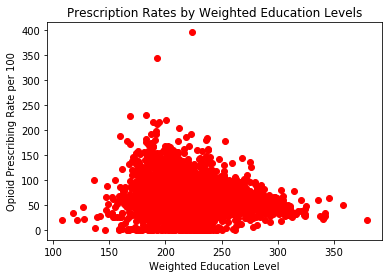

In [27]:
x_axis = np.arange(0, 390, 10)

plt.title('Prescription Rates by Weighted Education Levels')
plt.xlabel('Weighted Education Level')
plt.ylabel('Opioid Prescribing Rate per 100')
plt.scatter(chart_df['Weighted Ed Level'], chart_df['Opioid Prescribing Rate per 100'], marker="o", color="red")

plt.show()


In [28]:
# Save chart as png
plt.savefig('prescriptions_v_ed_levels.png')

<Figure size 432x288 with 0 Axes>